## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [10]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [11]:
event_vars

ntracks  ngood_fastjets           ht  HLT_PFHT1050  eta_ak4jets0  \
0           50               2  1347.875000          True     -0.709595   
1           90               2  1355.968750          True     -0.541016   
2          119               2  1710.015625          True     -1.616455   
3          122               2  1385.531250          True     -0.915405   
4           65               1  1489.656250          True     -1.737305   
...        ...             ...          ...           ...           ...   
43871       95               2  1622.500000          True      0.165314   
43872       82               2  1410.984375          True      1.521973   
43873       98               2  1496.250000          True     -0.667236   
43874      107               2  1376.375000          True     -1.486084   
43875       57               2  1334.156250          True     -0.309814   

       phi_ak4jets0  pt_ak4jets0  eta_ak4jets1  phi_ak4jets1  pt_ak4jets1  \
0         -0.800171        616.5      1.121582      2.507812       549.00   
1         -0.204865        668.0      0.656128      2.794922       543.00   
2          1.991455        793.0      1.111572     -1.262695       555.50   
3          1.861816        603.0     -1.146973     -1.175293       532.50   
4         -2.491699        725.5      0.848633      0.723633       710.00   
...             ...          ...           ...           ...          ...   
43871      2.753906        731.0     -1.029785     -0.462708       713.50   
43872      0.314697        648.5      1.657715     -2.451660       330.25   
43873      1.192627        641.0     -1.939209     -1.899170       608.00   
43874     -0.699707        651.0     -0.388306      2.528809       524.00   
43875     -1.117920        602.5     -0.490479      2.104492       602.00   

       ...  ISR_rho0_CO  ISR_rho1_CO  SUEP_pt_CO  SUEP_eta_CO  SUEP_phi_CO  \
0      ...     0.000000    15.276150  392.055695    -0.711756    -0.696928   
1      ...     4.040412     2.219756  360.567535     0.780889     2.868628   
2      ...    17.837120     0.911567  436.422424     1.023168    -1.251795   
3      ...     0.000000     0.000000  368.923004    -0.882091    -1.322696   
4      ...          NaN          NaN         NaN          NaN          NaN   
...    ...          ...          ...         ...          ...          ...   
43871  ...    13.281656     5.494289  473.850189     0.553546     2.606002   
43872  ...     0.000000     0.943411  239.874084     1.807931    -2.671183   
43873  ...    12.718546     0.638345  301.926727    -0.631078     1.248707   
43874  ...     0.000000     0.091591  327.749512    -1.369677    -0.670427   
43875  ...    15.227668     2.522998  248.716721    -0.409784    -0.962176   

       SUEP_mass_CO   ISR_pt_CO  ISR_eta_CO  ISR_phi_CO  ISR_mass_CO  
0        226.865966  240.555740    1.043696    2.489329    91.176312  
1        276.139740  170.697266   -0.692364   -0.255960    88.999084  
2        511.675043  508.138733   -1.599250    1.979718   155.402002  
3        624.731217  269.843506   -1.240674    1.845117   210.921380  
4               NaN         NaN         NaN         NaN          NaN  
...             ...         ...         ...         ...          ...  
43871    623.938109  388.940674   -1.077335   -0.455498   149.865071  
43872    227.510904  467.469360    1.539635    0.436712   229.834614  
43873    543.375211  395.066376   -1.951102   -1.896852    87.333835  
43874    426.275423  583.436829   -0.218542    2.475083   300.208528  
43875    189.913581  212.699509   -0.534391    2.092296    76.750233  

[43876 rows x 101 columns]

In [7]:
m

{'gensumweight': 80561.0, 'era': 2018, 'mc': 1, 'sample': 'X'}

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

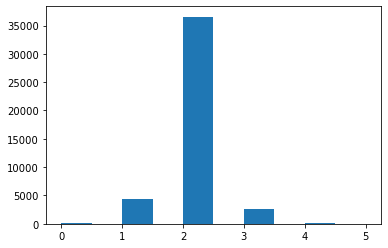

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


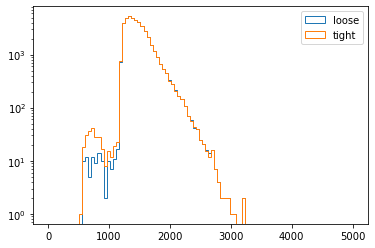

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))